In [1]:
import sys 
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd
import xarray as xr

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/python-gsw/')
import gsw

In [2]:
data = np.load('transect_northzemlya_august2018.npz')

/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'lw'
/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarn

Text(-0.12, 1.05, 'f')

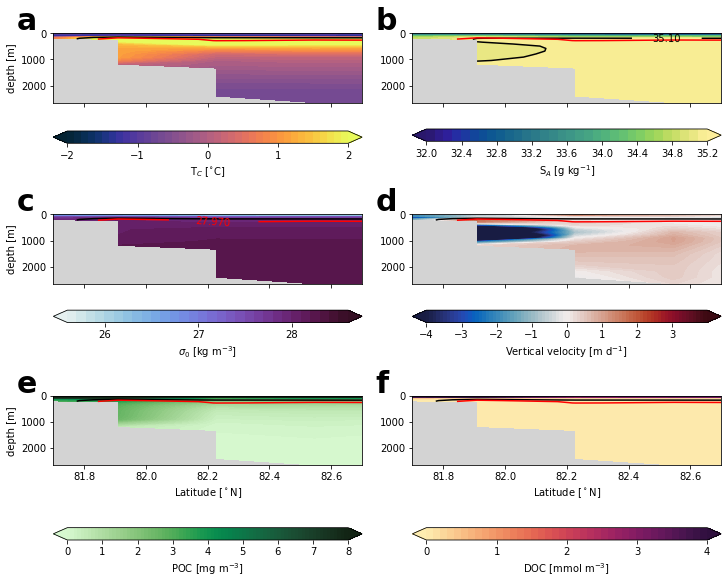

In [20]:
figsize=(10,8)

maxdepth = 3000
depth_index=(abs(data['depth']-maxdepth)).argmin()

rho = np.ma.array(data['rho'], mask = data['mask'])
ct = np.ma.array(data['ct'], mask = data['mask'])
sa = np.ma.array(data['sa'], mask = data['mask'])
w = np.ma.array(data['w'], mask = data['mask'])
poc = np.ma.array(data['poc'], mask = data['mask'])
doc = np.ma.array(data['doc'], mask = data['mask'])

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=figsize, constrained_layout=True, sharex=True, facecolor='w', edgecolor='k')


    
    
image1 = ax1.contourf(data['lonlat'][:,1], data['depth'][:depth_index], ct[:,:depth_index].T,
                                levels = np.arange(-2,2.1,.1), cmap = cmap.cm.thermal, extend='both')
ax1.invert_yaxis()
ax1.patch.set_facecolor('lightgray')
cb = fig.colorbar(image1, orientation='horizontal', ax = ax1, pad=0.16, ticks = np.arange(-2,3,1))
cb.set_label('T$_C$ [$^{\circ}$C]')

    
ax1.contour(data['lonlat'][:,1], data['depth'][6:depth_index], sa[:,6:depth_index].T,
                                levels = [34.92], colors = 'k', lw=3)
ax1.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
    
    
    
#image2= ax2.contourf(data['lonlat'][:,1], data['depth'[:depth_index], data['sa'][:,:depth_index].T, levels = np.arange(32,35.2,.1), cmap = cmap.cm.haline, extend='both')
image2 = ax2.contourf(data['lonlat'][:,1], data['depth'][:depth_index], sa[:,:depth_index].T,
                                levels = np.arange(32,35.2,.1), cmap = cmap.cm.haline, extend='both')
                                               
ax2.invert_yaxis()
ax2.patch.set_facecolor('lightgray')
cb = fig.colorbar(image2, orientation='horizontal', ax = ax2, pad=0.16, ticks = np.arange(32,35.2,.4))
cb.set_label('S$_A$ [g kg$^{-1}$]')
CS2 = ax2.contour(data['lonlat'][:9,1], data['depth'][1:depth_index], sa[:9,1:depth_index].T,
                                levels = [35.1], colors = 'k', lw=3)
ax2.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
ax2.clabel(CS2, [35.1],  # label every second level # sa = 34.94
          fmt='%1.2f', fontsize=10, inline = 1, inline_spacing = -5)
    
    
      
image3= ax3.contourf(data['lonlat'][:,1], data['depth'][:depth_index], rho[:,:depth_index].T,
                                levels = np.arange(25.6,28.7,.1), cmap = cmap.cm.dense, extend='both')
ax3.invert_yaxis()
ax3.patch.set_facecolor('lightgray')
cb = fig.colorbar(image3, orientation='horizontal', ax = ax3, pad=0.16, ticks = np.arange(26,28.2,1))
cb.set_label('$\sigma_0$ [kg m$^{-3}$]')
ax3.contour(data['lonlat'][:,1], data['depth'][6:depth_index], sa[:,6:depth_index].T,
                                levels = [34.92], colors = 'k', lw=3)
CS3 = ax3.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
    
ax3.clabel(CS3, [27.97],  # label every second level
          inline=0.1, fmt='%1.3f', fontsize=10, inline_spacing = -5)
    
    
    
image4= ax4.contourf(data['lonlat'][:,1], data['depth'][:depth_index], 24*3600*w[:,:depth_index].T,
                                levels = np.arange(-4,4.1,.1), cmap = cmap.cm.balance, extend='both')
ax4.invert_yaxis()
ax4.patch.set_facecolor('lightgray')
cb = fig.colorbar(image4, orientation='horizontal', ax = ax4, pad=0.16, ticks = np.arange(-4,4,1))
cb.set_label('Vertical velocity [m d$^{-1}$]')
    
ax4.contour(data['lonlat'][:,1], data['depth'][6:depth_index], sa[:,6:depth_index].T,
                                levels = [34.92], colors = 'k', lw=3)
ax4.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
    
    

image5= ax5.contourf(data['lonlat'][:,1], data['depth'][:depth_index], poc[:,:depth_index].T,
                                levels = np.arange(0,8.1,.1), cmap = cmap.cm.algae, extend='both')
ax5.invert_yaxis()
ax5.patch.set_facecolor('lightgray')
cb = fig.colorbar(image5, orientation='horizontal', ax = ax5, pad=0.16, ticks = np.arange(0,9,1))
cb.set_label('POC [mg m$^{-3}$]')
    
ax5.contour(data['lonlat'][:,1], data['depth'][6:depth_index], sa[:,6:depth_index].T,
                                levels = [34.92], colors = 'k', lw=3)
ax5.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
    
    
    
image6= ax6.contourf(data['lonlat'][:,1], data['depth'][:depth_index], doc[:,:depth_index].T,
                                levels = np.arange(0,4.1,.1), cmap = cmap.cm.matter, extend='both')
ax6.invert_yaxis()
ax6.patch.set_facecolor('lightgray')
cb = fig.colorbar(image6, orientation='horizontal', ax = ax6, pad=0.16, ticks = np.arange(0,5,1))
cb.set_label('DOC [mmol m$^{-3}$]')
    
ax6.contour(data['lonlat'][:,1], data['depth'][6:depth_index], sa[:,6:depth_index].T,
                                levels = [34.92], colors = 'k', lw=3)
ax6.contour(data['lonlat'][:,1], data['depth'][6:depth_index], rho[:,6:depth_index].T,
                                levels = [27.97], colors = 'r', lw=3)
    
    
ax1.set_xlim(81.7,82.7)


ax1.set_ylabel('depth [m]')
ax3.set_ylabel('depth [m]')
ax5.set_ylabel('depth [m]')
ax5.set_xlabel('Latitude [$^\circ$N]')
ax6.set_xlabel('Latitude [$^\circ$N]')
    
ax1.text(-0.12, 1.05, 'a', transform=ax1.transAxes,
                size=30, weight='bold')
ax2.text(-0.12, 1.05, 'b', transform=ax2.transAxes,
                size=30, weight='bold')
ax3.text(-0.12, 1.05, 'c', transform=ax3.transAxes,
                size=30, weight='bold')
ax4.text(-0.12, 1.05, 'd', transform=ax4.transAxes,
                size=30, weight='bold')
ax5.text(-0.12, 1.05, 'e', transform=ax5.transAxes,
                size=30, weight='bold')
ax6.text(-0.12, 1.05, 'f', transform=ax6.transAxes,
                size=30, weight='bold')